## Primordial Black Holes (in Dark Matter clothing)

See the associated notes for more details.

Some initialisation stuff:

In [23]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as pl

from scipy.integrate import quad

#Change default font size so you don't need a magnifying glass
matplotlib.rc('font', **{'size'   : 15})

Some function definitions

In [24]:
#Maximum eccentricity
def emax(a, f=1.0, xbar=1.0):
    return np.sqrt(1.0-(f**1.5)*(a/xbar)**1.5)

In [25]:
#PDF for a and e
def P_ae(a, e, f=1.0, xbar=1.0):
    if (e > emax(a, f, xbar)):
        return 0.0
    else:
        return 0.75*(f**1.5)*(xbar**-1.5)*(a**0.5)*e*(1-e**2)**-1.5

### Probability distribution of semi-major axis and eccentricity

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


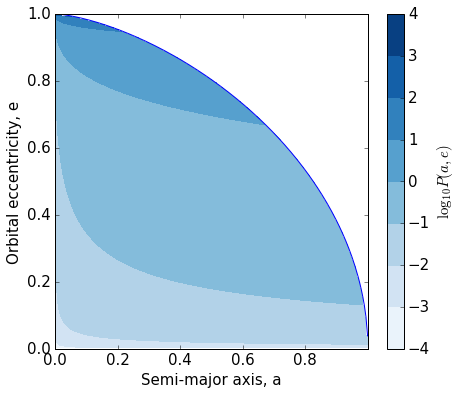

In [17]:
#Plot it
a_list = np.linspace(0, 0.999,201)
e_list = np.linspace(0, 0.999,201)
a_grid, e_grid = np.meshgrid(a_list, e_list, indexing='xy')

P_ae_vec = np.vectorize(P_ae)

pl.figure(figsize=(7,6))

pl.contourf(a_grid, e_grid, np.log10(P_ae_vec(a_grid, e_grid)), cmap="Blues")

pl.plot(a_list, emax(a_list))

pl.colorbar(label=r"$\log_{10}P(a, e)$")

pl.xlabel("Semi-major axis, a")
pl.ylabel("Orbital eccentricity, e")

pl.savefig("../plots/PDF_axis_eccentricity.pdf", bbox_inches="tight")
pl.show()

Check parameter ranges (for changing the order of integration). First, shade in blue the range of allowed $r$ values for a given $a$:

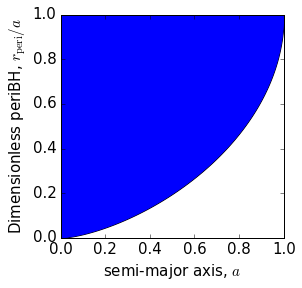

In [16]:
a_list = np.linspace(0.0, 1.0,1001)
r_list = 1- emax(a_list, 1.0, 1.0)

pl.figure(figsize=(4,4))

pl.plot(a_list, r_list)
pl.fill_between(a_list, r_list, 1.0)

pl.xlabel(r"semi-major axis, $a$")
pl.ylabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.show()

Now plot the same thing, but the allowed $a$ values as a function of $r$:

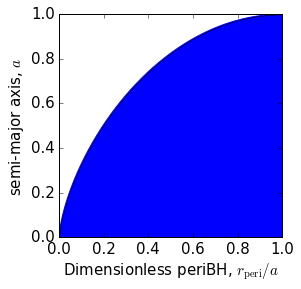

In [15]:
r_list = np.linspace(0.0, 1.0,1001)
a_list = (1.0-(1.0-r_list)**2.0)**(2.0/3.0)

pl.figure(figsize=(4,4))

pl.plot(r_list, a_list)
pl.fill_between(r_list, 0.0,a_list)

pl.ylabel(r"semi-major axis, $a$")
pl.xlabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.show()

### Probability distribution of periBH

In [18]:
def P_r(r):
    return 0.5*(1-r)*(2*r - r**2)**-0.5

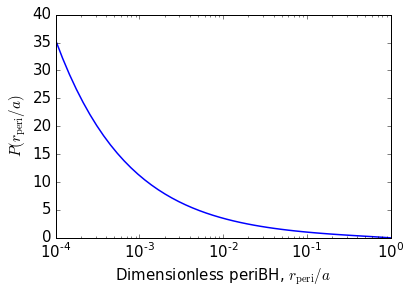

Distribution is normalised to:  0.5


In [22]:
pl.figure()

r_list = np.logspace(-4, 0)
pl.semilogx(r_list, P_r(r_list), linewidth=1.5)

pl.ylabel(r"$P(r_\mathrm{peri}/a)$")
pl.xlabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.savefig("../plots/PDF_periBH.pdf", bbox_inches="tight")
pl.show()

#Check the normalisation
print "Distribution is normalised to: ", quad(P_r, 0, 1)[0]